In [2]:
# Assignment
# You will anaylize a dataset of the global average sea level change since 1880. 
# You will use the data to predict the sea level change through year 2050.

# Use the data to complete the following tasks:


# Use matplotlib to create a scatter plot using the "Year" column as the x-axis 
# and the "CSIRO Adjusted Sea Level" column as the y-axix.

# Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. 
# Plot the line of best fit over the top of the scatter plot. 
# Make the line go through the year 2050 to predict the sea level rise in 2050.
# Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
# Make the line also go through the year 2050 to predict the sea level rise in 2050 
# if the rate of rise continues as it has since the year 2000.

# The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".
# Unit tests are written for you under test_module.py.

# Development
# For development, you can use main.py to test your functions. Click the "run" button and main.py will run.

# Testing
# We imported the tests from test_module.py to main.py for your convenience. 
# The tests will run automatically whenever you hit the "run" button.

# Submitting
# Copy your project's URL and submit it to freeCodeCamp.

# Data Source
# Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
# https://datahub.io/core/sea-level-rise

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import sys


def draw_plot():
    # Use Pandas to import the data from epa-sea-level.csv.
    sea_lvl = pd.read_csv('epa-sea-level.csv')


    # Use matplotlib to create a scatter plot using the "Year" column as the x-axis 
    sealevelfigure = sea_lvl.plot(
        kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', figsize=(12, 6))

    # Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. 
   

    max_year = 2050
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(
        sea_lvl['Year'], sea_lvl['CSIRO Adjusted Sea Level'])

    df_predict1 = sea_lvl[['Year', 'CSIRO Adjusted Sea Level']].copy()

    # Make the line go through the year 2050 to predict the sea level rise in 2050.
    for i in range(df_predict1['Year'].max() + 1, max_year):
        df_predict1 = df_predict1.append(
            {
                'Year': i,
                'CSIRO Adjusted Sea Level': intercept1 + slope1 * i
            },
            ignore_index=True)

    # Plot the line of best fit over the top of the scatter plot. 
    plt.plot(
        df_predict1['Year'],
        intercept1 + slope1 * df_predict1['Year'],
        'tab:red',
        label='Prediction 1880-2050')
    plt.legend()

    # Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
    
    df_predict2 = sea_lvl[(sea_lvl['Year'] >= 2000)
                          & (sea_lvl['Year'] <= sea_lvl['Year'].max())]
    
    # Make the line also go through the year 2050 to predict the sea level rise in 2050 
    # if the rate of rise continues as it has since the year 2000.
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
        df_predict2['Year'], df_predict2['CSIRO Adjusted Sea Level'])

    for i in range(df_predict2['Year'].max() + 1, max_year):
        df_predict2 = df_predict2.append(
            {
                'Year': i,
                'CSIRO Adjusted Sea Level': intercept2 + slope2 * i
            },
            ignore_index=True)

    plt.plot(
        df_predict2['Year'],
        intercept2 + slope2 * df_predict2['Year'],
        'tab:green',
        label='Prediction 2000-2050')
    plt.legend()

    # The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".
    # Unit tests are written for you under test_module.py.

    plt.xlabel("Year")
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

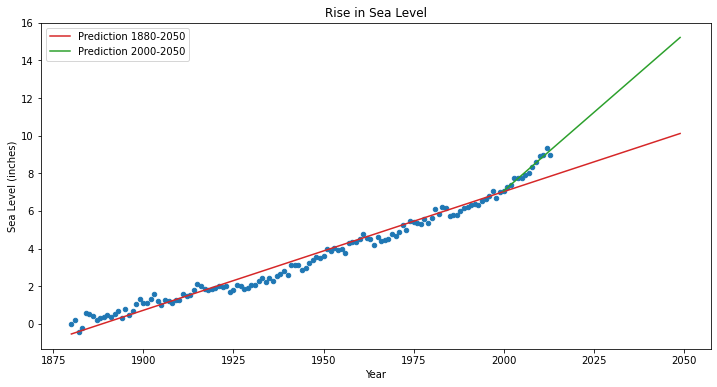

In [12]:
draw_plot()